In [1]:
%load_ext autoreload
%autoreload 2

In [30]:
results = {
    '1_states': "./results/planner_200_1states.csv",
    # '5states': "./results/planner_200_5states.csv",
    '10_states': "./results/planner_200_10states.csv",
}

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [34]:
results_df = {
    key: pd.read_csv(value)
    for key, value in results.items()
}
results_df['1_states'].head(3)

,row_id,empirical_voa,predicted_voa,empirical_baseline,predicted_baseline,predicted_with_help
0,0,1.864269,-0.028016,0.083536,0.678175,0.650159
1,1,2.177866,0.965418,0.083536,0.701345,1.666763
2,2,2.903816,0.981686,0.083536,1.630193,2.611880


In [35]:
def compute_and_print_metrics(df, name):
    voa = df['empirical_voa']
    pred = df['predicted_voa']

    errors = pred - voa
    mae = np.mean(np.abs(errors))
    mse = np.mean(errors ** 2)
    overestimation_by03 = np.sum(errors > 0.3) / len(errors)
    underestimation_by03 = np.sum(errors < -0.3) / len(errors)

    print("Metrics for", name)
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"Signed error: {np.mean(errors)}")
    print(f"Overestimation by 0.3: {overestimation_by03}")
    print(f"Underestimation by 0.3: {underestimation_by03}")
    print()
    return mae, mse, overestimation_by03, underestimation_by03


In [36]:
n_states = []
maes = []
mses = []
overestimations = []
underestimations = []
for key, value in results_df.items():
    mae, mse, overestimation, underestimation = compute_and_print_metrics(value, key)
    n_states.append(key.split('_')[0])
    maes.append(mae)
    mses.append(mse)
    overestimations.append(overestimation)
    underestimations.append(underestimation)

Metrics for 1_states
MAE: 1.1609632903140037
MSE: 2.157779900640661
Signed error: -0.10681206915104526
Overestimation by 0.3: 0.372
Underestimation by 0.3: 0.454

Metrics for 10_states
MAE: 0.75219205663618
MSE: 0.9114452316831969
Signed error: -0.03238567084345875
Overestimation by 0.3: 0.36233333333333334
Underestimation by 0.3: 0.38566666666666666



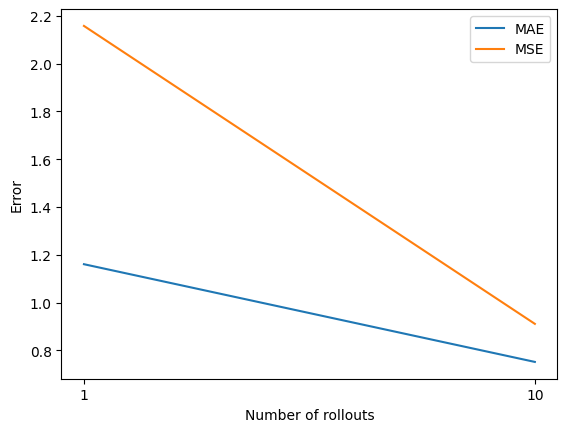

In [37]:
# plot mae and mse given number of states
plt.figure()
plt.plot(n_states, maes, label='MAE')
plt.plot(n_states, mses, label='MSE')
plt.xlabel('Number of rollouts')
plt.ylabel('Error')

plt.legend()

